<div class="alert alert-block alert-success">
    <b><center>DEEP NEURAL NETWORK</center></b>
    <b><center>MNIST 데이터로 DNN 구현해 보기</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
import rspy as rsp
rsp.setSystemWarning(off=True)

2021-07-25 04:52:58.672129: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from ipywidgets import interact

In [3]:
import tensorflow as tf
from tensorflow.keras import utils, layers, activations, models, losses, optimizers, metrics, callbacks

In [4]:
np.set_printoptions(linewidth=200, precision=2)
tf.__version__

'2.4.1'

# Prepare Data

In [5]:
# Download the mnist dataset using keras
(trainDatas, trainLabels), (testDatas, testLabels) = tf.keras.datasets.mnist.load_data()
trainDatas.shape, trainLabels.shape, testDatas.shape, testLabels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Analysis Datas

In [6]:
@interact(idx=(0, 60000))
def showImage(idx):
    plt.imshow(trainDatas[idx], cmap="gray")
    plt.grid(False)
    plt.title(f"LABEL : {trainLabels[idx]}")
    plt.show()

interactive(children=(IntSlider(value=30000, description='idx', max=60000), Output()), _dom_classes=('widget-i…

In [7]:
trainDatas[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

# Preprocessing Data

In [8]:
# 2차원(28*28)이미지를 1차원 배열로 변환
trainDatas = trainDatas.reshape(-1, 28*28)
testDatas = testDatas.reshape(-1, 28*28)

trainDatas.shape, testDatas.shape

((60000, 784), (10000, 784))

In [9]:
# 레이블 one hot encoding
trainLabels = np.eye(10)[trainLabels]
testLabels  = np.eye(10)[testLabels]

trainLabels.shape, trainLabels.shape

((60000, 10), (60000, 10))

# Generate Model

In [10]:
model = models.Sequential([
    layers.Input([784]),
    layers.Dense(256, activation=tf.keras.activations.relu),
#     layers.Dropout(0.2),
    layers.Dense(10, activation=tf.keras.activations.softmax)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


2021-07-25 04:53:00.861322: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-07-25 04:53:00.862204: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-07-25 04:53:00.884031: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2021-07-25 04:53:00.884052: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: jupyterlab
2021-07-25 04:53:00.884056: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: jupyterlab
2021-07-25 04:53:00.884155: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.42.1
2021-07-25 04:53:00.884175: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 465.31.0
2021-07-25 04:5

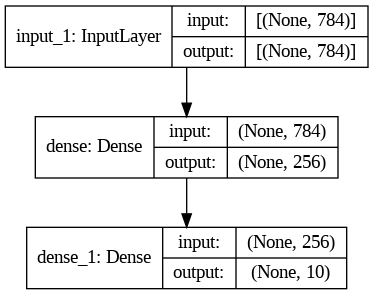

In [11]:
utils.plot_model(model, 'model.png', show_shapes=True)

In [12]:
model.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=optimizers.Adam(learning_rate=0.0001),
    metrics = [metrics.CategoricalAccuracy()]
)

# Training

In [13]:
history = model.fit(
    trainDatas, trainLabels,
    batch_size=1000,
    epochs=20,
    validation_split=0.2
)

2021-07-25 04:53:01.036814: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-07-25 04:53:01.037292: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz


Epoch 1/20
48/48 [==============================] - 1s 15ms/step - loss: 96.6399 - categorical_accuracy: 0.2391 - val_loss: 16.8110 - val_categorical_accuracy: 0.6790
Epoch 2/20
48/48 [==============================] - 0s 6ms/step - loss: 15.0336 - categorical_accuracy: 0.7056 - val_loss: 9.4090 - val_categorical_accuracy: 0.7937
Epoch 3/20
48/48 [==============================] - 0s 6ms/step - loss: 8.9637 - categorical_accuracy: 0.7991 - val_loss: 7.0646 - val_categorical_accuracy: 0.8349
Epoch 4/20
48/48 [==============================] - 0s 6ms/step - loss: 6.6385 - categorical_accuracy: 0.8370 - val_loss: 5.8047 - val_categorical_accuracy: 0.8551
Epoch 5/20
48/48 [==============================] - 0s 6ms/step - loss: 5.3863 - categorical_accuracy: 0.8624 - val_loss: 4.9690 - val_categorical_accuracy: 0.8691
Epoch 6/20
48/48 [==============================] - 0s 6ms/step - loss: 4.4586 - categorical_accuracy: 0.8786 - val_loss: 4.4300 - val_categorical_accuracy: 0.8804
Epoch 7/20
4

<AxesSubplot:>

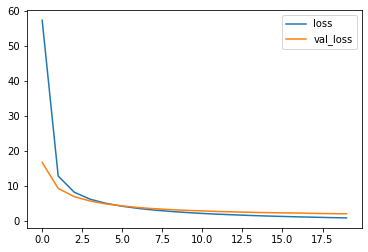

In [14]:
history_df = pd.DataFrame(history.history)
history_df[["loss", "val_loss"]].plot()

# Evaluate

In [15]:
evaLoss, evaAcc = model.evaluate(testDatas, testLabels, verbose=0)
evaLoss, "{:3.2f} %".format(evaAcc*100)

(2.089867353439331, '92.59 %')

# Predict

In [16]:
dataPred = model.predict(testDatas)

In [17]:
errors = []
for index, item in enumerate(dataPred):
    if testLabels[index].argmax() != item.argmax():
        errors.append(index)

In [18]:
errors

[8,
 61,
 65,
 119,
 121,
 149,
 175,
 193,
 195,
 211,
 224,
 227,
 233,
 241,
 245,
 247,
 259,
 264,
 282,
 298,
 320,
 321,
 331,
 335,
 338,
 340,
 352,
 359,
 362,
 381,
 389,
 403,
 412,
 425,
 433,
 444,
 447,
 448,
 456,
 457,
 471,
 478,
 479,
 488,
 495,
 507,
 515,
 531,
 536,
 543,
 582,
 583,
 591,
 610,
 613,
 619,
 628,
 629,
 667,
 681,
 684,
 687,
 689,
 691,
 692,
 707,
 716,
 717,
 720,
 738,
 740,
 760,
 774,
 791,
 810,
 830,
 846,
 874,
 877,
 882,
 909,
 924,
 938,
 944,
 947,
 951,
 956,
 959,
 965,
 969,
 1003,
 1010,
 1014,
 1017,
 1024,
 1032,
 1039,
 1044,
 1045,
 1051,
 1052,
 1055,
 1068,
 1087,
 1107,
 1112,
 1120,
 1152,
 1154,
 1156,
 1181,
 1185,
 1191,
 1192,
 1194,
 1198,
 1202,
 1204,
 1206,
 1208,
 1219,
 1226,
 1229,
 1232,
 1234,
 1242,
 1247,
 1251,
 1256,
 1260,
 1272,
 1274,
 1279,
 1282,
 1283,
 1287,
 1289,
 1291,
 1315,
 1319,
 1326,
 1337,
 1356,
 1364,
 1378,
 1403,
 1409,
 1410,
 1411,
 1414,
 1422,
 1429,
 1433,
 1435,
 1440,
 1444,
 1

In [19]:
testDatas[1].reshape(-1, 784).shape

(1, 784)

In [20]:
@interact(idx=(0, 10000))
def showTestImage(idx):
    data = testDatas[idx].reshape(-1, 784)
    dataPred = model.predict(data)

    plt.imshow(testDatas[idx].reshape(28,28), cmap="gray")
    plt.grid(False)
    plt.title(f"LABEL: {np.argmax(testLabels[idx])}, PREDICT: {np.argmax(dataPred)}")
    plt.show()

interactive(children=(IntSlider(value=5000, description='idx', max=10000), Output()), _dom_classes=('widget-in…